In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

data = pd.read_csv('C:\\Users\\Danie\\OneDrive - University of Strathclyde\\Big Data Fundamentals\\Credit Card.csv')


#Hiding warning messages for improved presentation
import warnings
warnings.filterwarnings('ignore')

In [2]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [3]:
print ('Number of rows and columns ',data.shape)
data.info()

Number of rows and columns  (10000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [4]:
#Calculating the number of defaulters
data['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

Percentage of defaults : 3.33 %


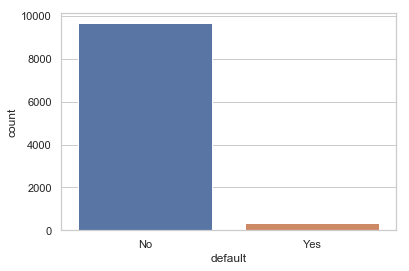

In [5]:
# Calculating the number of defaults as a percentage

#Total number of values in default variable
Total_Count = data['default'].count()

#Total number of defaults in default variable
Total_Default_Count = data[data['default']=='Yes'].default.count()

Default_Ratio = float(Total_Default_Count)/Total_Count 

print ('Percentage of defaults :',round(Default_Ratio * 100.0 , 2),'%')

# Plotting default variable
sns.countplot(x='default',data=data)

Percentage of students : 29.44 %


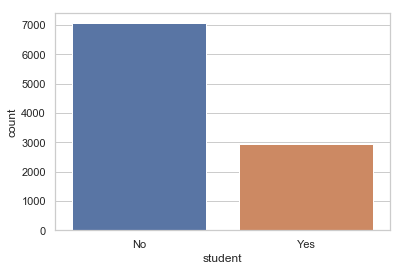

In [6]:
# Calculating the number of students in the dataset

# Plotting student variable
sns.countplot(x='student',data=data)

#Total number of values in student variable
Total_Count = data['student'].count()

#Total number of students in the student variable
Total_Student_Count = data[data['student']=='Yes'].student.count()

Student_Ratio = float(Total_Student_Count)/ Total_Count 

print ('Percentage of students :',round(Student_Ratio * 100,2),'%')

In [7]:
# Checking if students are less or more likely to default

Student_Data = data[data['student'] == 'Yes']
Student_Defaulters = Student_Data[Student_Data.default == 'Yes'].default.count()

print('Percentage of Students who are defaulter : ',
      round(float(Student_Defaulters)*100 /Student_Data ['student'].count(),2),'%')

Non_Student_Data = data[data['student'] == 'No']
Non_Student_Defaulters = Student_Data[Student_Data.default == 'Yes'].default.count()

print ('Percentage of Non Students who are defaulters: ', 
       round(float(Non_Student_Defaulters)*100 /Non_Student_Data['student'].count(),2), '%')

Percentage of Students who are defaulter :  4.31 %
Percentage of Non Students who are defaulters:  1.8 %


(771.9677293999999, 73554.2335)

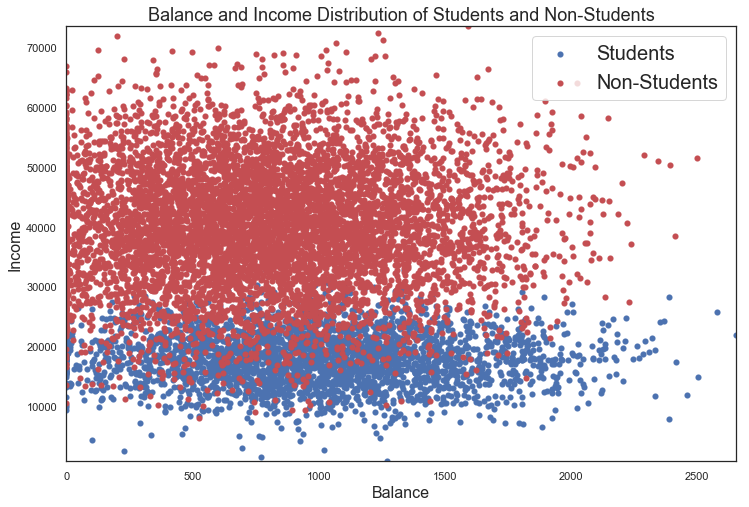

In [8]:
title_font = {'fontname':'Arial', 'size':'18'} 
axis_font = {'fontname':'Arial', 'size':'16'} 

sns.set(style="white") #Background
sns.set(style="white", color_codes=True)

fig, ax = plt.subplots(1, 1, figsize = (12, 8)) #Setting the width and height of plot as 10 and 6 

Student_plot = plt.scatter(data.balance[data.student == 'Yes'], 
                           data.income[data.student == 'Yes'],color='b',linewidth=0.1, alpha=1)

Non_Student_plot = plt.scatter(data.balance[data.student == 'No'], 
                               data.income[data.student == 'No'],color='r',linewidth=0.1, alpha=1)


plt.legend((Student_plot, Non_Student_plot),('Students', 'Non-Students'),scatterpoints=1,loc='Upper right',ncol=1, fontsize=20,frameon=True)


plt.title("Balance and Income Distribution of Students and Non-Students",**title_font) 

plt.xlabel("Balance",**axis_font)

plt.ylabel("Income",**axis_font) 

plt.xlim(min(data.balance), max(data.balance)) #Limiting x axis to minimum and maximum value of x (i.e balance)

plt.ylim(min(data.income), max(data.income)) #Limiting y axis to minimum and maximum value of y (i.e income)

(771.9677293999999, 73554.2335)

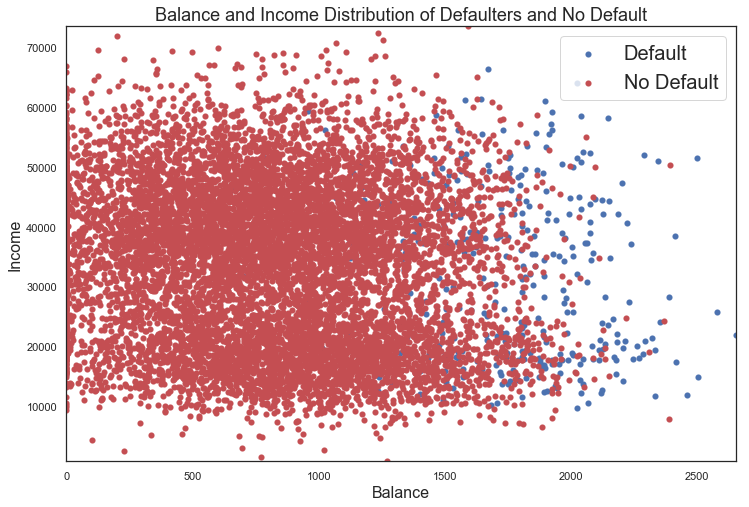

In [9]:
title_font = {'fontname':'Arial', 'size':'18'}
axis_font = {'fontname':'Arial', 'size':'16'} 

sns.set(style="white")  # Background
sns.set(style="white", color_codes=True)

fig, ax = plt.subplots(1, 1, figsize = (12, 8)) # Setting the width and height of plot as 10 and 6 respectively

Defaulter_Plot = plt.scatter(data.balance[data.default == 'Yes'], 
                           data.income[data.default == 'Yes'],color='b',linewidth=0.1, alpha=1)

Non_Defaulter_Plot = plt.scatter(data.balance[data.default == 'No'], 
                               data.income[data.default == 'No'],color='r',linewidth=0.1, alpha=1)


plt.legend((Defaulter_Plot, Non_Defaulter_Plot),('Default', 'No Default'),scatterpoints=1,loc='Upper right',ncol=1, fontsize=20,frameon=True)

plt.title("Balance and Income Distribution of Defaulters and No Default",**title_font) 

plt.xlabel("Balance",**axis_font) 

plt.ylabel("Income",**axis_font) 

plt.xlim(min(data.balance), max(data.balance)) # Limiting x axis to minimum and maximum value 

plt.ylim(min(data.income), max(data.income)) # Limiting y axis to minimum and maximum value 

In [10]:
data.balance.describe()

count    10000.000000
mean       835.374886
std        483.714985
min          0.000000
25%        481.731105
50%        823.636973
75%       1166.308387
max       2654.322576
Name: balance, dtype: float64

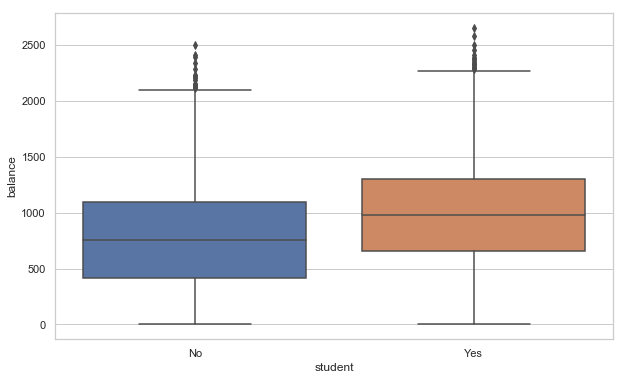

In [11]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(1, 1, figsize = (10, 6)) # Setting the width and height of plot as 10 and 6 
sns.boxplot(y="balance", x = 'student', data=data)

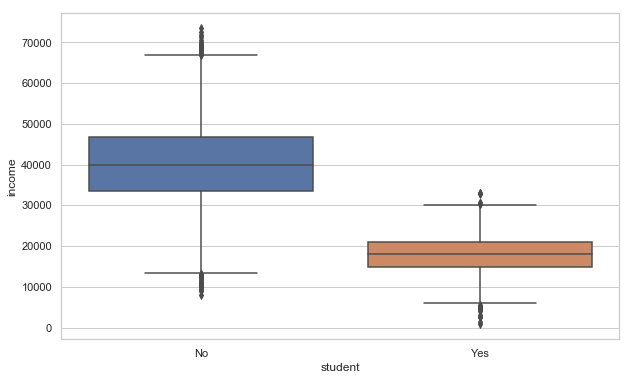

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6)) # Setting the width and height of plot as 12 and 8 

sns.boxplot(y="income", x = 'student', data=data)

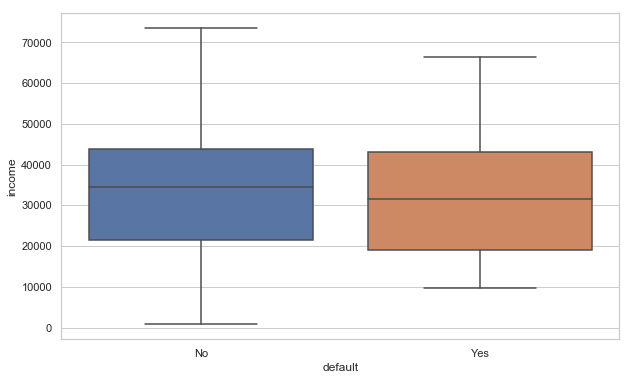

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6)) # Setting the width and height of plot as 12 and 8 
sns.boxplot(y="income", x = 'default', data=data)

In [14]:
data.groupby('default').mean()

,balance,income
default,,
No,803.94375,33566.166625
Yes,1747.82169,32089.147124


In [15]:
data.groupby('student').mean()

,balance,income
student,,
No,771.770402,40011.952857
Yes,987.818239,17950.230775


In [16]:
# Numerical statistics for non-students
Non_Student_Stats = data[data.student=='No'].describe()
Non_Student_Stats

,balance,income
count,7056.000000,7056.000000
mean,771.770402,40011.952857
std,469.674899,10010.288665
min,0.000000,8017.638591
25%,418.156627,33417.480950
50%,759.189136,39893.287400
75%,1093.263029,46840.569767
max,2499.016750,73554.233500


In [17]:
# Numerical statistics for Default
Default_Stats = data[data.default=='Yes'].describe()
Default_Stats

,balance,income
count,333.000000,333.000000
mean,1747.821690,32089.147124
std,341.266808,13804.221110
min,652.397134,9663.788159
25%,1511.610952,19027.508630
50%,1789.093391,31515.344490
75%,1988.869747,43067.333740
max,2654.322576,66466.460890


# K-Prototype Clustering

In [18]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from matplotlib import style
import csv

In [19]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [20]:
# Importing data into an array
# Leaving out the 'default' feature before clustering - this is the dependent variable
with open ('C:\\Users\\Danie\\OneDrive - University of Strathclyde\\Big Data Fundamentals\\Credit Card.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
X= np.asarray(data)
X = X[:,1:]
data

[['default', 'student', 'balance', 'income'],
 ['No', 'No', '729.5264952', '44361.62507'],
 ['No', 'Yes', '817.1804066', '12106.1347'],
 ['No', 'No', '1073.549164', '31767.13895'],
 ['No', 'No', '529.2506047', '35704.49394'],
 ['No', 'No', '785.6558829', '38463.49588'],
 ['No', 'Yes', '919.5885305', '7491.558572'],
 ['No', 'No', '825.5133305', '24905.22658'],
 ['No', 'Yes', '808.6675043', '17600.45134'],
 ['No', 'No', '1161.057854', '37468.52929'],
 ['No', 'No', '0', '29275.26829'],
 ['No', 'Yes', '0', '21871.07309'],
 ['No', 'Yes', '1220.583753', '13268.56222'],
 ['No', 'No', '237.045114', '28251.69534'],
 ['No', 'No', '606.7423433', '44994.55585'],
 ['No', 'No', '1112.968401', '23810.17405'],
 ['No', 'No', '286.2325601', '45042.41304'],
 ['No', 'No', '0', '50265.31235'],
 ['No', 'Yes', '527.5401841', '17636.53962'],
 ['No', 'No', '485.9368642', '61566.10612'],
 ['No', 'No', '1095.072735', '26464.63139'],
 ['No', 'No', '228.9525496', '50500.1822'],
 ['No', 'No', '954.2617928', '32457.

In [21]:
#Removing header 
X = X[1:]
X

array([['No', '729.5264952', '44361.62507'],
       ['Yes', '817.1804066', '12106.1347'],
       ['No', '1073.549164', '31767.13895'],
       ...,
       ['No', '845.4119892', '58636.15698'],
       ['No', '1569.009053', '36669.11236'],
       ['Yes', '200.9221826', '16862.95232']], dtype='<U11')

In [22]:
#Converting all the numerical entries into float
X[:, 1:] = X[:, 1:].astype(float)
X

array([['No', '729.5264952', '44361.62507'],
       ['Yes', '817.1804066', '12106.1347'],
       ['No', '1073.549164', '31767.13895'],
       ...,
       ['No', '845.4119892', '58636.15698'],
       ['No', '1569.009053', '36669.11236'],
       ['Yes', '200.9221826', '16862.95232']], dtype='<U11')

In [23]:
#Scaling Data
from sklearn import preprocessing
X[:,1] = preprocessing.scale(X[:,1])
X[:,2] = preprocessing.scale(X[:,2])
X

array([['No', '-0.21883482', '0.813187266'],
       ['Yes', '-0.03761592', '-1.60549572'],
       ['No', '0.492410190', '-0.13121224'],
       ...,
       ['No', '0.020751074', '1.883565274'],
       ['No', '1.516742036', '0.236362997'],
       ['Yes', '-1.31169065', '-1.24880501']], dtype='<U11')

In [24]:
#Running K-Prototype on dataset with different  number of clusters each time and observing the cost

Cluster_Count = []
Model_Cost = []

for k in range(2, 10):
    print ('Number of clusters : ',k)
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=2)
    clusters = kproto.fit_predict(X, categorical=[0])
    Cluster_Count.append(k)
    Model_Cost.append(kproto.cost_)
    print ('*'*100)
    

Number of clusters :  2
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2031, ncost: 15831.893358197425
Run: 1, iteration: 2/100, moves: 1563, ncost: 14023.359406847172
Run: 1, iteration: 3/100, moves: 1438, ncost: 12956.353839631682
Run: 1, iteration: 4/100, moves: 475, ncost: 12836.672932630616
Run: 1, iteration: 5/100, moves: 94, ncost: 12832.750764275
Run: 1, iteration: 6/100, moves: 16, ncost: 12832.5818701616
Run: 1, iteration: 7/100, moves: 5, ncost: 12832.545698696797
Run: 1, iteration: 8/100, moves: 0, ncost: 12832.545698696797
****************************************************************************************************
Number of clusters :  3
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 20

Run: 1, iteration: 22/100, moves: 6, ncost: 3607.05194211539
Run: 1, iteration: 23/100, moves: 5, ncost: 3607.042865600574
Run: 1, iteration: 24/100, moves: 6, ncost: 3607.0210579345735
Run: 1, iteration: 25/100, moves: 3, ncost: 3607.014096452133
Run: 1, iteration: 26/100, moves: 1, ncost: 3607.013083994467
Run: 1, iteration: 27/100, moves: 0, ncost: 3607.013083994467
****************************************************************************************************
Number of clusters :  9
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2599, ncost: 3486.31060500508
Run: 1, iteration: 2/100, moves: 1341, ncost: 3286.2222253715017
Run: 1, iteration: 3/100, moves: 762, ncost: 3215.0458093223965
Run: 1, iteration: 4/100, moves: 506, ncost: 3184.632208185797
Run: 1, iteration: 5/100, moves: 388, ncost: 3168.3348635494494
Run: 1, iteration: 6/100, mo

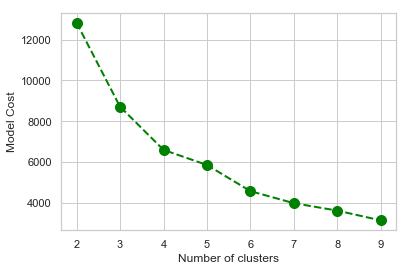

In [25]:
x = np.array(Cluster_Count)
y= np.array(Model_Cost)
plt.plot(x, y, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=10)
plt.xlabel("Number of clusters") 
plt.ylabel("Model Cost") 
plt.show()

In [26]:
#Setting clusters to 4 as this is where the biggest decline in cost happens but we could chose any number up to 8
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)
clusters = kproto.fit_predict(X, categorical=[0])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 907, ncost: 6921.2542452069
Run: 1, iteration: 2/100, moves: 571, ncost: 6842.559711318756
Run: 1, iteration: 3/100, moves: 404, ncost: 6799.092169168496
Run: 1, iteration: 4/100, moves: 296, ncost: 6774.202757803787
Run: 1, iteration: 5/100, moves: 229, ncost: 6759.50709582786
Run: 1, iteration: 6/100, moves: 165, ncost: 6750.473335538005
Run: 1, iteration: 7/100, moves: 120, ncost: 6746.027647635293
Run: 1, iteration: 8/100, moves: 71, ncost: 6744.733872495803
Run: 1, iteration: 9/100, moves: 51, ncost: 6743.820950475796
Run: 1, iteration: 10/100, moves: 31, ncost: 6743.400508179943
Run: 1, iteration: 11/100, moves: 10, ncost: 6743.363820708824
Run: 1, iteration: 12/100, moves: 2, ncost: 6743.360414366056
Run: 1, iteration: 13/100, moves: 2, ncost: 6743.357785305049
Run: 1, iteration: 14/100, moves

In [27]:
# Print cluster centroids of the trained model
print ('Centroids are: ',kproto.cluster_centroids_)
# Print training statistics
print ('Model Cost: ',kproto.cost_)

Centroids are:  [array([[ 0.75399489,  0.63510417],
       [ 0.83284005, -1.13948755],
       [-0.84598768,  0.90082184],
       [-0.77850586, -0.70168867]]), array([['No'],
       ['Yes'],
       ['No'],
       ['No']], dtype='<U3')]
Model Cost:  6743.357785305049


In [28]:
#Joining the clusters in original data
Clustered_data=pd.DataFrame({'student':X[:,0],'balance':X[:,1],'income':X[:,2],'cluster':clusters}) 
Clustered_data.head()

,student,balance,income,cluster
0,No,-0.21883482,0.813187266,2
1,Yes,-0.03761592,-1.60549572,1
2,No,0.492410190,-0.13121224,0
3,No,-0.63289250,0.164030934,2
4,No,-0.10279087,0.370915126,0


In [29]:
# Dummifying student variable

Clustered_data.student[Clustered_data.student == 'Yes'] = 1
Clustered_data.student[Clustered_data.student == 'No'] = 0

Clustered_data.head()

,student,balance,income,cluster
0,0,-0.21883482,0.813187266,2
1,1,-0.03761592,-1.60549572,1
2,0,0.492410190,-0.13121224,0
3,0,-0.63289250,0.164030934,2
4,0,-0.10279087,0.370915126,0


<Figure size 432x288 with 0 Axes>

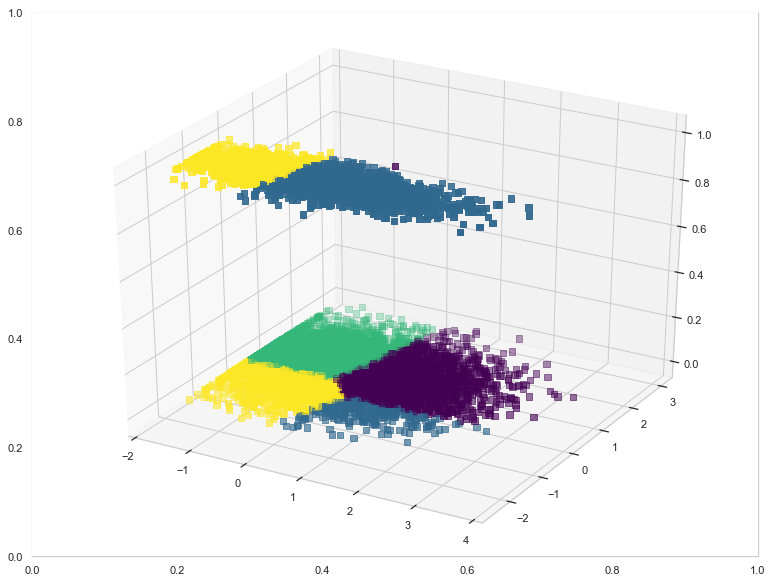

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize = (13, 10)) # Setting the width and height of plot as 13 and 10 respectively
ax = fig.add_subplot(111, projection='3d')

x = np.array(Clustered_data['balance'])
y = np.array(Clustered_data['income'])
z = np.array(Clustered_data['student'])

x = x.astype(np.float)
y = y.astype(np.float)
z = z.astype(np.float)

ax.scatter(x,y,z, marker="s", c=clusters, s=40, cmap="viridis")

plt.show()

# Logistic Regression 

In [31]:
from sklearn import preprocessing
from sklearn import metrics
plt.rc("font", size=20)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#Hiding warning messages for improved presentation
import warnings
warnings.filterwarnings('ignore')

C:\Users\Danie\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
data = pd.read_csv('C:\\Users\\Danie\\OneDrive - University of Strathclyde\\Big Data Fundamentals\\Credit Card.csv')

data.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [33]:
# Dummifying default variable
data.default[data.default == 'Yes'] = 1
data.default[data.default == 'No'] = 0

# Dummifying student variable
data.student[data.student == 'Yes'] = 1
data.student[data.student == 'No'] = 0

data.head()

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


In [34]:
#First logistic regression will be applied to the imbalanced dataset
#We will include income even though the exploration found it has little impact on the dependent variable default

In [35]:
# Fitting the model using all 3 available features and predicting probabiility of default

x = data.drop('default',axis=1) # Taking out the predictors in x variable

y = data['default'] # Taking out the dependent variable in y variable

y= y.astype('int') # Need to make sure has integar format

# Splitting the data into training and test datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) # Keeping 30% of records aside as test
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predicting the defaulters for test dataset and calculating the accuracy
y_pred = logreg.predict(x_test) # Contains the predictions of being defaulter or not for each record in test dataset

#logreg score compares values of dependent variable ('default') predicted by model with actual values in test dataset
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.96
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2887
          1       0.00      0.00      0.00       113

avg / total       0.93      0.96      0.94      3000



In [36]:
# Using SMOTE (Synthetic Minority Oversampling Technique) to increase the number of minority classes in 
# dataset by oversampling it

from imblearn.over_sampling import SMOTE

x = data.drop('default',axis = 1)

y = data['default'] # Taking out the dependent variable in y variable
y= y.astype('int')

os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0) # Splitting the data into test and train
columns = x_train.columns

os_data_X,os_data_y=os.fit_sample(x_train, y_train) # Oversampling training dataset
os_data_X = pd.DataFrame(data=os_data_X,columns=columns ) # Converting oversampled predictors data into dataframe
os_data_y= pd.DataFrame(data=os_data_y,columns=['y']) # Converting oversampled dependent variable into dataframe

# We can check the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
print("Number of non-defaulters in oversampled data ",len(os_data_y[os_data_y['y']==0]))
print("Number of defaulters",len(os_data_y[os_data_y['y']==1]))
print("Proportion of non-defaulters data in oversampled data is ",len(os_data_y[os_data_y['y']==0])*1.0/len(os_data_X))
print("Proportion of defaulters in oversampled data is ",len(os_data_y[os_data_y['y']==1])*1.0/len(os_data_X))

logreg = LogisticRegression()
logreg.fit(os_data_X,os_data_y)

from sklearn.metrics import classification_report
# Predicting the defaulters for test dataset and calculating the accuracy
y_pred = logreg.predict(x_test) # Contains the predictions of being defaulter or not for each record in test dataset on basis of 0.5


#logreg score compares values of dependent variable ('default variable') predicted by model with actual values in test dataset
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

print(classification_report(y_test, y_pred))
probs = logreg.predict_proba(x_test)[:,1]

Length of oversampled data is  11632
Number of non-defaulters in oversampled data  5816
Number of defaulters 5816
Proportion of non-defaulters data in oversampled data is  0.5
Proportion of defaulters in oversampled data is  0.5
Accuracy of logistic regression classifier on test set: 0.85
             precision    recall  f1-score   support

          0       1.00      0.85      0.92      3851
          1       0.19      0.90      0.31       149

avg / total       0.97      0.85      0.90      4000



In [37]:
# Appending predicting values in x_test data
x_test['probs'] = pd.DataFrame(data=probs,index=x_test.index) 

x_test.head()

,student,balance,income,probs
9394,1,0.000000,13911.44128,0.000806
898,0,396.985985,55454.63104,0.004162
2398,0,1046.416673,47598.30737,0.166830
5906,0,836.343137,34559.15840,0.128807
2343,1,534.692907,18729.56624,0.009724


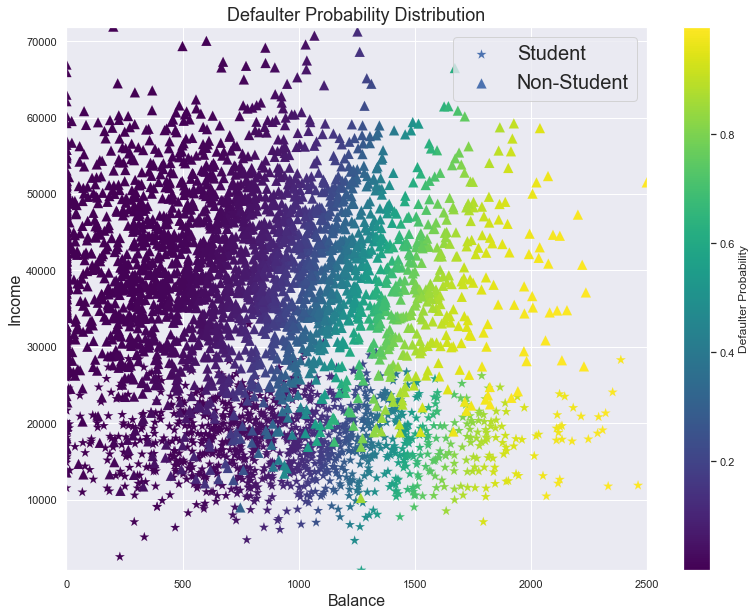

In [38]:
title_font = {'fontname':'Arial', 'size':'18'}
axis_font = {'fontname':'Arial', 'size':'16'}

sns.set(style="dark")  
sns.set(style="darkgrid", color_codes=True)

fig, ax = plt.subplots(1, 1, figsize = (13, 10)) # Setting the width and height of plot as 12 and 8 

plota = plt.scatter(x_test.balance[x_test.student == 1], x_test.income[x_test.student == 1],
                    marker ='*',c=x_test[x_test.student == 1].probs, cmap='viridis',linewidth=0.1, alpha=1,s=100)

plotb = plt.scatter(x_test.balance[x_test.student == 0], x_test.income[x_test.student == 0],
                   marker ='^',c=x_test[x_test.student == 0].probs, cmap='viridis',linewidth=0.1, alpha=1,s=100)

plt.legend((plota,plotb),('Student', 'Non-Student'),scatterpoints=1,loc='Upper right',ncol=1, fontsize=20,frameon=True)


plt.title("Defaulter Probability Distribution",**title_font) 

plt.xlabel("Balance",**axis_font) 

plt.ylabel("Income",**axis_font)

plt.xlim(min(x_test.balance), max(x_test.balance)) 

plt.ylim(min(x_test.income), max(x_test.income)) 

plt.colorbar(label='Defaulter Probability')

In [39]:
x_test.head()

,student,balance,income,probs
9394,1,0.000000,13911.44128,0.000806
898,0,396.985985,55454.63104,0.004162
2398,0,1046.416673,47598.30737,0.166830
5906,0,836.343137,34559.15840,0.128807
2343,1,534.692907,18729.56624,0.009724


In [40]:
#Getting details for report
import sys
print (sys.version)

3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


In [41]:
#Getting locally imported modules from current notebook
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

      
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.9.0
scikit-learn==0.19.2
pandas==0.23.4
numpy==1.15.1
matplotlib==2.2.3
kmodes==0.9
imblearn==0.0
